In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# イジングモデルの認識

$$\frac{Tc}{J} = \frac{2}{\log{(1 + \sqrt{2})}}$$
$J=1$で固定した。

In [2]:
Tc = 2 / np.log(1 + np.sqrt(2))
Tc

2.2691853142130221

# $Tc > T$のデータ(ラベル 0)を`Data0`に代入

In [3]:
Data0_train = pd.read_csv("isingModel_data2_0.csv")
Data0_train.head()

,1,2,3,4,5,6,7,8,9,10,...,1593,1594,1595,1596,1597,1598,1599,1600,temp,label
0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,0
1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,0
2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,0
4,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0


In [4]:
Data0_train.shape

(4200, 1602)

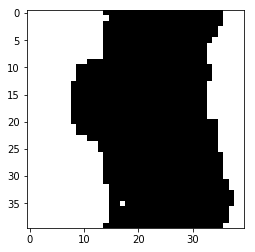

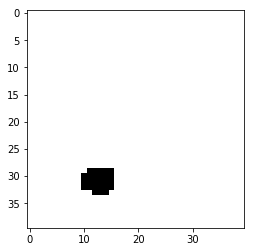

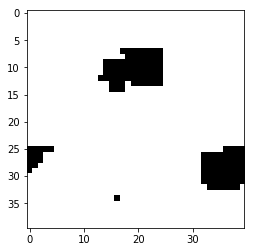

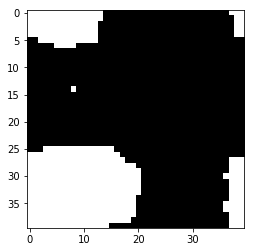

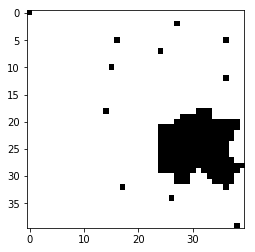

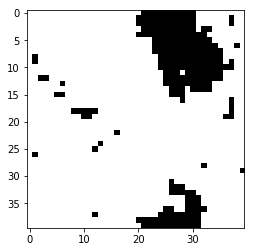

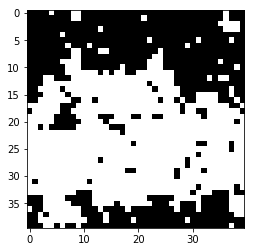

In [5]:
# plot
from itertools import product

size=40
"""
fig, ax = plt.subplots(3, 2, figsize=(20, 10))
for idx, i in zip(product([0,1,2], [0,1]), [0, 100, 300, 500, 1500, 2900]):
    ax[idx[0], idx[1]].imshow(Data1.iloc[i, :-1].values.reshape(size, size), vmin=-1, vmax=1,
                         cmap=plt.cm.gray_r, interpolation='nearest')
"""
for i in [0, 100, 300, 500, 1500, 2900, 4199]:
    plt.imshow(Data0_train.iloc[i, :-2].values.reshape(size, size), vmin=-1, vmax=1,
                         cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

# $Tc < T$のデータ(ラベル 1)を`Data1`に代入

In [6]:
Data1_train =  pd.read_csv("isingModel_data2_1.csv")
Data1_train.head()

,1,2,3,4,5,6,7,8,9,10,...,1593,1594,1595,1596,1597,1598,1599,1600,temp,label
0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,2.3125,1
1,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,2.3125,1
2,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.3125,1
3,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2.3125,1
4,-1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,2.3125,1


In [7]:
Data1_train.shape

(4000, 1602)

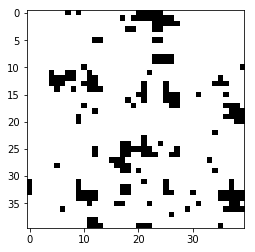

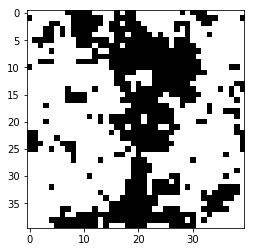

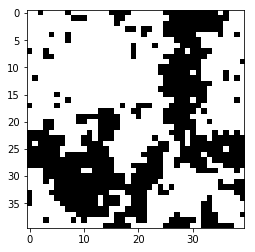

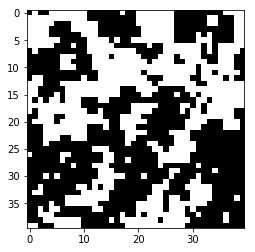

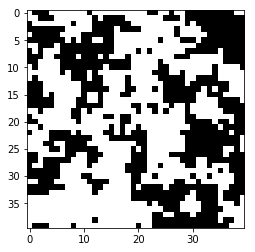

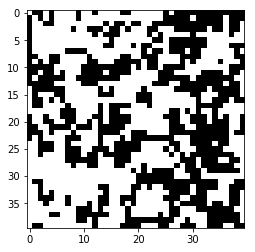

In [8]:
#plot

size=40
for i in [0, 100, 300, 500, 1500, 2900]:
    plt.imshow(Data1_train.iloc[i, :-2].values.reshape(size, size), vmin=-1, vmax=1,
                         cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

# データ行列 $\boldsymbol{X}$ とラベル $\boldsymbol{y}$ を作成

In [14]:
X_train = pd.concat([Data0_train.iloc[ :,:-2], Data1_train.iloc[ :,:-2]], ignore_index=True)
X_train

,1,2,3,4,5,6,7,8,9,10,...,1591,1592,1593,1594,1595,1596,1597,1598,1599,1600
0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0
1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
8,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
9,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [15]:
y_train = pd.concat([Data0_train.iloc[:,-1], Data1_train.iloc[:,-1]], ignore_index=True)
y_train

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
8170    1
8171    1
8172    1
8173    1
8174    1
8175    1
8176    1
8177    1
8178    1
8179    1
8180    1
8181    1
8182    1
8183    1
8184    1
8185    1
8186    1
8187    1
8188    1
8189    1
8190    1
8191    1
8192    1
8193    1
8194    1
8195    1
8196    1
8197    1
8198    1
8199    1
Name: label, Length: 8200, dtype: int64

In [11]:
np.bincount(y)

array([4200, 4000], dtype=int64)

# テストデータと学習データに分割 (今はすべて学習データとして使った)

In [13]:
"""
from sklearn.model_selection import train_test_split

# テストデータサイズは全体の３割 
# 層化を行いクラスごとのデータ数の偏りをなくす
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0,
                                                    stratify=y, shuffle=True)

print(np.unique(y_train, return_counts=True)[1] / y_train.size)
print(np.unique(y_test, return_counts=True)[1] / y_test.size)
"""

'\nfrom sklearn.model_selection import train_test_split\n\n# テストデータサイズは全体の３割 \n# 層化を行いクラスごとのデータ数の偏りをなくす\nX_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0,\n                                                    stratify=y, shuffle=True)\n\nprint(np.unique(y_train, return_counts=True)[1] / y_train.size)\nprint(np.unique(y_test, return_counts=True)[1] / y_test.size)\n'

# テストデータを用意

In [12]:
Data0_test = pd.read_csv("isingModel_data2_test_0.csv") # クラスラベルが0のテストデータ
Data0_test

,1,2,3,4,5,6,7,8,9,10,...,1593,1594,1595,1596,1597,1598,1599,1600,temp,label
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,0
1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.00,0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,0
3,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,1.00,0
4,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.00,0
5,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.00,0
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,0
7,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.00,0
8,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.00,0
9,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.00,0


In [13]:
Data1_test = pd.read_csv("isingModel_data2_test_1.csv") # クラスラベルが1のテストデータ
Data1_test

,1,2,3,4,5,6,7,8,9,10,...,1593,1594,1595,1596,1597,1598,1599,1600,temp,label
0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2.3125,1
1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,2.3125,1
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,2.3125,1
3,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2.3125,1
4,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,2.3125,1
5,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2.3125,1
6,1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,2.3125,1
7,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,2.3125,1
8,-1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,2.3125,1
9,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2.3125,1


In [16]:
X_test = pd.concat([Data0_test.iloc[ :,:-2], Data1_test.iloc[ :,:-2]], ignore_index=True)
X_test

,1,2,3,4,5,6,7,8,9,10,...,1591,1592,1593,1594,1595,1596,1597,1598,1599,1600
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0
4,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
5,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
8,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
9,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [22]:
y_test = pd.concat([Data0_test.iloc[:,-1], Data1_test.iloc[:,-1]], ignore_index=True)
y_test

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
2430    1
2431    1
2432    1
2433    1
2434    1
2435    1
2436    1
2437    1
2438    1
2439    1
2440    1
2441    1
2442    1
2443    1
2444    1
2445    1
2446    1
2447    1
2448    1
2449    1
2450    1
2451    1
2452    1
2453    1
2454    1
2455    1
2456    1
2457    1
2458    1
2459    1
Name: label, Length: 2460, dtype: int64

# MLP( Neural Network) で識別

In [13]:
from sklearn.preprocessing import StandardScaler  # 標準化
sc = StandardScaler()
"""
X_train_sc = sc.fit_transform(X_train, y_train)

for i in [0, -100, -300, -500, -1500, -2900]:
    plt.imshow(X_train.iloc[i, :].values.reshape(size, size), vmin=-1, vmax=1,
                         cmap=plt.cm.gray_r, interpolation='nearest')
    plt.imshow(X_train_sc[i, :].reshape(size, size), vmin=-1, vmax=1,
                         cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()
"""

"\nX_train_sc = sc.fit_transform(X_train, y_train)\n\nfor i in [0, -100, -300, -500, -1500, -2900]:\n    plt.imshow(X_train.iloc[i, :].values.reshape(size, size), vmin=-1, vmax=1,\n                         cmap=plt.cm.gray_r, interpolation='nearest')\n    plt.imshow(X_train_sc[i, :].reshape(size, size), vmin=-1, vmax=1,\n                         cmap=plt.cm.gray_r, interpolation='nearest')\n    plt.show()\n"

In [18]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100,)) # 隠れ層１層で隠れ素子は100つ

あとの引数はdefault

[sklearn.neural_network.MLPClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [19]:
from sklearn.pipeline import Pipeline
#steps = [('sc', sc), ('mlp', mlp)]
steps = [('mlp', mlp)]
pipe = Pipeline(steps=steps)

In [18]:
pipe.set_params

<bound method Pipeline.set_params of Pipeline(memory=None,
     steps=[('mlp', MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False))])>

In [20]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('mlp', MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False))])

In [23]:
pipe.score(X_test, y_test)

0.94024390243902434

# グリッドサーチ

__前処理__
 - 白色化PCA
 - PCA
 - 標準化
 - 線形判別分析(LDA)
 - 白色化ZCA (<- まだ実装していないのでだめ)
 
__MLPパラメータ__ (隠れ層 1つ, 隠れ素子 3つ)
 - 正則化係数
 - 活性化関数

In [19]:
from sklearn.grid_search import GridSearchCV

param_grid={'mlp__alpha': [10**n for n in range(-3, 3)]}

grid = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)
grid.fit(X_train.values, y_train.ravel())

C:\Users\4th\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\4th\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:  3.8min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  4.2min finished
C:\Users\4th\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('sc', StandardScaler(copy=True, with_mean=True, with_std=True)), ('mlp', MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_in...=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'mlp__alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=2)

In [20]:
grid.best_params_

{'mlp__alpha': 0.01}

In [21]:
grid.best_score_

0.7664285714285715

In [22]:
grid.score(X_test, y_test)

0.79888888888888887

In [23]:
grid.best_estimator_.named_steps['mlp'].coefs_ # The ith element in the list represents the weight matrix corresponding to layer i.

[array([[-0.0309927 , -0.04853173,  0.02134902, ...,  0.00076901,
         -0.04016952,  0.03649491],
        [ 0.03758829, -0.00492291,  0.0452762 , ...,  0.0226275 ,
          0.02763568,  0.0559273 ],
        [-0.03189368,  0.01130245, -0.05053407, ...,  0.00071838,
         -0.04113489,  0.03301115],
        ..., 
        [-0.06287933,  0.01410673, -0.03350317, ...,  0.01083473,
          0.05743746,  0.04669985],
        [ 0.02367498, -0.01095918, -0.05765764, ...,  0.00498308,
          0.00305373,  0.01600659],
        [ 0.01090735, -0.05062735,  0.04722972, ...,  0.02118803,
         -0.01665696, -0.004805  ]]), array([[-0.2445637 ],
        [ 0.07147961],
        [-0.27055982],
        [-0.04513117],
        [-0.13122336],
        [-0.2957974 ],
        [ 0.16494287],
        [-0.21327424],
        [-0.14039505],
        [ 0.19412942],
        [ 0.11046912],
        [ 0.1241585 ],
        [-0.28940078],
        [ 0.22105019],
        [-0.30865368],
        [ 0.14398815],
     

In [25]:
grid.best_estimator_.named_steps['mlp'].intercepts_ # バイアス項

[array([ 0.07817725, -0.08190202,  0.090637  ,  0.11826163,  0.15252636,
         0.02975339, -0.01425495,  0.07917502,  0.15878555, -0.02593112,
         0.00296167, -0.05689032,  0.07939557, -0.02867062,  0.03348165,
        -0.03511244, -0.00651009,  0.02738513, -0.06971309,  0.04645957,
        -0.07510786,  0.03499693,  0.03291051, -0.02618035,  0.05674166,
        -0.04424098, -0.00913896,  0.07920106, -0.07580013,  0.03472694,
         0.10683482,  0.05401421,  0.07604452,  0.10320993,  0.19916223,
        -0.02235423,  0.0133697 , -0.06749461,  0.0466392 ,  0.00522529,
        -0.07564486, -0.0100873 , -0.05872944, -0.04821802, -0.06773841,
         0.0322097 ,  0.0422305 ,  0.01666884,  0.17933519, -0.08027037,
         0.08591887, -0.08554089,  0.00467412, -0.02840508,  0.0390439 ,
         0.06313597,  0.05019754, -0.0091599 ,  0.07303126, -0.02948306,
         0.07269203,  0.0861861 ,  0.00208485,  0.10611737, -0.01216376,
         0.02777543,  0.08068992, -0.06385539,  0.0

# やってみたいこと

[重みの視覚化 Visualization of MLP weights on MNIST](http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html)

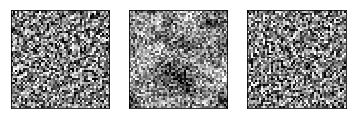

In [34]:
mlp = grid.best_estimator_.named_steps['mlp']
fig, axes = plt.subplots(1, 3)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(50, 50), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())